In [6]:
#import
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [7]:
# DATAFRAME GENERAL
questions_df = pd.read_pickle('questions_df_2017to2019.pkl')
questions_df.head(10)

,date_question,date_reponse,groupe_auteur,ministere_adresse,question,rubrique,titre
0,2019-04-23,NaT,LAREM,Ministère de la justice,M. Jean-Charles Colas-Roy attire l'attention d...,droits fondamentaux,Reconnaissance de la langue des signes françai...
1,2018-06-12,2018-12-25,LAREM,Ministère de l’intérieur,M. Bertrand Sorre attire l'attention de M. le ...,sécurité routière,Précision sur les 80 km/h
2,2018-06-19,2018-10-02,LAREM,Ministère de la transition écologique et solid...,Mme Françoise Dumas attire l'attention de M. l...,eau et assainissement,Aides des agences de l'eau aux projets de réha...
3,2019-07-02,NaT,FI,Ministère de l'intérieur,M. Alexis Corbière alerte M. le ministre de l'...,sécurité des biens et des personnes,Conditions de travail des pompiers professionn...
4,2018-05-01,2018-09-25,LAREM,Ministère de l’intérieur,Mme Barbara Pompili appelle l'attention de M. ...,sécurité routière,Forfait post-stationnement et loueurs courte d...
5,2019-04-09,NaT,GDR,Ministère de l'action et des comptes publics,M. André Chassaigne attire l'attention de M. l...,professions de santé,Statut des conducteurs ambulanciers hospitalie...
6,2018-10-02,2019-05-07,SOC,Ministère de la justice,M. Régis Juanico interroge Mme la garde des sc...,ministères et secrétariats d'État,Rémunérations des membres du cabinet de la min...
7,2017-12-12,2018-04-10,FI,Ministère de l'éducation nationale,Mme Sabine Rubin attire l'attention de M. le m...,enseignement secondaire,Absence de collège public et laïque sur la com...
8,2019-03-05,NaT,LAREM,"Secrétariat d'État auprès du Premier ministre,...",M. Gaël Le Bohec interroge Mme la secrétaire d...,assurance maladie maternité,Grossesse - Prise en charge par la sécurité so...
9,2018-10-16,NaT,LR,Ministère des solidarités et de la santé,M. Gérard Menuel attire l'attention de Mme la ...,fonction publique hospitalière,Facturation du SMUR par les établissements hos...


In [8]:
# Les themes ordonnés par nombre de question au total
themes_count = questions_df.groupby('rubrique').count().sort_values(ascending=False,by='question')['question']
themes = [theme for theme in themes_count.index]
themes_count.head(10)

rubrique
professions de santé                   1140
personnes handicapées                   986
agriculture                             825
impôts et taxes                         752
santé                                   607
énergie et carburants                   598
politique extérieure                    574
sécurité routière                       544
assurance maladie maternité             460
sécurité des biens et des personnes     450
Name: question, dtype: int64

In [9]:
# Transformation en un df contenant pour chaque semaine la répartition des thèmes
count_df_week = pd.DataFrame(index = questions_df.groupby('date_question').groups).fillna(0)
for theme in questions_df.groupby('rubrique').groups:
    m = questions_df[(questions_df.rubrique == theme)].set_index(['date_question','rubrique']).count(level='date_question')['question']
    count_df_week[theme] = m
count_df_week = count_df_week.fillna(0)
count_df_week.head(10)

,Français de l'étranger,Gouvernement,Internet,Mutualité sociale agricole,Parlement,Union européenne,accidents du travail et maladies professionnelles,administration,agriculture,agroalimentaire,...,économie sociale et solidaire,éducation physique et sportive,égalité des sexes et parité,élections et référendums,élevage,élus,énergie et carburants,établissements de santé,état civil,étrangers
2017-07-04,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
2017-07-11,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-07-18,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-07-25,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,6.0,2.0,...,0.0,0.0,0.0,1.0,3.0,1.0,1.0,2.0,0.0,0.0
2017-08-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,1.0,...,0.0,0.0,6.0,0.0,0.0,0.0,2.0,2.0,1.0,0.0
2017-08-08,0.0,1.0,0.0,0.0,1.0,3.0,0.0,2.0,30.0,1.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2017-08-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,0.0,1.0
2017-08-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2017-08-29,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
2017-09-05,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,4.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,2.0,4.0,0.0,0.0


In [10]:
# Transformation en un df contenant pour chaque mois la répartition des thèmes

#Fonction pour le mois
def mon(a):
    return dt.date(a.year,a.month,1)

count_df_month = pd.DataFrame(index = questions_df.set_index('date_question').groupby(by = mon).groups)
for theme in questions_df.groupby('rubrique').groups:
    count_df_month[theme] = questions_df[(questions_df.rubrique == theme)].set_index('date_question').groupby(by=mon).count()['question']
count_df_month = count_df_month.fillna(0)
count_df_month.head(10)

,Français de l'étranger,Gouvernement,Internet,Mutualité sociale agricole,Parlement,Union européenne,accidents du travail et maladies professionnelles,administration,agriculture,agroalimentaire,...,économie sociale et solidaire,éducation physique et sportive,égalité des sexes et parité,élections et référendums,élevage,élus,énergie et carburants,établissements de santé,état civil,étrangers
2017-07-01,1.0,0.0,4.0,0.0,2.0,0.0,0.0,4.0,13,2.0,...,0.0,0.0,0.0,2.0,3.0,1.0,3,2,0.0,0.0
2017-08-01,1.0,1.0,0.0,0.0,2.0,3.0,0.0,3.0,53,2.0,...,3.0,0.0,9.0,1.0,0.0,0.0,7,6,1.0,4.0
2017-09-01,0.0,0.0,3.0,0.0,1.0,2.0,0.0,0.0,30,1.0,...,2.0,0.0,2.0,2.0,0.0,1.0,17,8,2.0,6.0
2017-10-01,6.0,0.0,7.0,0.0,0.0,4.0,0.0,4.0,69,10.0,...,2.0,0.0,6.0,4.0,3.0,1.0,34,14,3.0,6.0
2017-11-01,0.0,0.0,2.0,0.0,0.0,2.0,0.0,1.0,37,7.0,...,0.0,0.0,2.0,2.0,2.0,3.0,18,12,3.0,2.0
2017-12-01,2.0,0.0,5.0,0.0,1.0,1.0,0.0,5.0,43,4.0,...,0.0,1.0,0.0,3.0,2.0,0.0,23,12,3.0,2.0
2018-01-01,1.0,0.0,2.0,1.0,0.0,4.0,0.0,12.0,19,5.0,...,0.0,0.0,1.0,6.0,7.0,0.0,11,4,1.0,7.0
2018-02-01,0.0,0.0,5.0,3.0,0.0,3.0,0.0,19.0,24,6.0,...,0.0,0.0,0.0,1.0,4.0,5.0,30,20,2.0,20.0
2018-03-01,4.0,0.0,2.0,1.0,2.0,3.0,0.0,18.0,30,3.0,...,0.0,0.0,0.0,3.0,7.0,1.0,36,12,1.0,10.0
2018-04-01,0.0,0.0,0.0,0.0,0.0,5.0,0.0,10.0,41,2.0,...,1.0,0.0,2.0,2.0,5.0,0.0,30,10,0.0,3.0


In [1]:
# Plotting
#fig, axes = plt.subplots(nrows=3, ncols=1)
#count_df_month.plot(y=themes[:3],ax = axes[0],title = "Nombre de questions par mois des 3 thèmes les plus représentés")
#count_df_week.plot(y=themes[:3],ax = axes[1],title = "Nombre de questions par semaine des 3 thèmes les plus représentés")
#count_df_week.sum(axis = 1).plot(ax = axes[2], figsize = (20,10),title = "Nombre de questions totales par semaine")

In [12]:
# DATAFRAME contenant la pondération par mois
count_df_month_pondmean = pd.DataFrame(columns = count_df_month.columns)
for index, row in count_df_month.iterrows():
    count_df_month_pondmean.loc[index] = row/row.sum()
count_df_month_pondmean.head(10)

,Français de l'étranger,Gouvernement,Internet,Mutualité sociale agricole,Parlement,Union européenne,accidents du travail et maladies professionnelles,administration,agriculture,agroalimentaire,...,économie sociale et solidaire,éducation physique et sportive,égalité des sexes et parité,élections et référendums,élevage,élus,énergie et carburants,établissements de santé,état civil,étrangers
2017-07-01,0.003636,0.000000,0.014545,0.000000,0.007273,0.000000,0.0,0.014545,0.047273,0.007273,...,0.000000,0.000000,0.000000,0.007273,0.010909,0.003636,0.010909,0.007273,0.000000,0.000000
2017-08-01,0.001783,0.001783,0.000000,0.000000,0.003565,0.005348,0.0,0.005348,0.094474,0.003565,...,0.005348,0.000000,0.016043,0.001783,0.000000,0.000000,0.012478,0.010695,0.001783,0.007130
2017-09-01,0.000000,0.000000,0.004934,0.000000,0.001645,0.003289,0.0,0.000000,0.049342,0.001645,...,0.003289,0.000000,0.003289,0.003289,0.000000,0.001645,0.027961,0.013158,0.003289,0.009868
2017-10-01,0.005172,0.000000,0.006034,0.000000,0.000000,0.003448,0.0,0.003448,0.059483,0.008621,...,0.001724,0.000000,0.005172,0.003448,0.002586,0.000862,0.029310,0.012069,0.002586,0.005172
2017-11-01,0.000000,0.000000,0.002548,0.000000,0.000000,0.002548,0.0,0.001274,0.047134,0.008917,...,0.000000,0.000000,0.002548,0.002548,0.002548,0.003822,0.022930,0.015287,0.003822,0.002548
2017-12-01,0.002181,0.000000,0.005453,0.000000,0.001091,0.001091,0.0,0.005453,0.046892,0.004362,...,0.000000,0.001091,0.000000,0.003272,0.002181,0.000000,0.025082,0.013086,0.003272,0.002181
2018-01-01,0.001414,0.000000,0.002829,0.001414,0.000000,0.005658,0.0,0.016973,0.026874,0.007072,...,0.000000,0.000000,0.001414,0.008487,0.009901,0.000000,0.015559,0.005658,0.001414,0.009901
2018-02-01,0.000000,0.000000,0.004965,0.002979,0.000000,0.002979,0.0,0.018868,0.023833,0.005958,...,0.000000,0.000000,0.000000,0.000993,0.003972,0.004965,0.029791,0.019861,0.001986,0.019861
2018-03-01,0.004215,0.000000,0.002107,0.001054,0.002107,0.003161,0.0,0.018967,0.031612,0.003161,...,0.000000,0.000000,0.000000,0.003161,0.007376,0.001054,0.037935,0.012645,0.001054,0.010537
2018-04-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.005359,0.0,0.010718,0.043944,0.002144,...,0.001072,0.000000,0.002144,0.002144,0.005359,0.000000,0.032154,0.010718,0.000000,0.003215


In [13]:
# DATAFRAME contenant la pondération par semaine
count_df_week_pondmean = pd.DataFrame(columns = count_df_week.columns)
for index, row in count_df_week.iterrows():
    count_df_week_pondmean.loc[index] = row/row.sum()
count_df_week_pondmean.head(10)

,Français de l'étranger,Gouvernement,Internet,Mutualité sociale agricole,Parlement,Union européenne,accidents du travail et maladies professionnelles,administration,agriculture,agroalimentaire,...,économie sociale et solidaire,éducation physique et sportive,égalité des sexes et parité,élections et référendums,élevage,élus,énergie et carburants,établissements de santé,état civil,étrangers
2017-07-04,0.029412,0.00000,0.000000,0.0,0.029412,0.000000,0.0,0.029412,0.029412,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.058824,0.000000,0.000000,0.000000
2017-07-11,0.000000,0.00000,0.000000,0.0,0.020000,0.000000,0.0,0.040000,0.060000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-07-18,0.000000,0.00000,0.041667,0.0,0.000000,0.000000,0.0,0.000000,0.062500,0.000000,...,0.000000,0.0,0.000000,0.020833,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-07-25,0.000000,0.00000,0.013986,0.0,0.000000,0.000000,0.0,0.006993,0.041958,0.013986,...,0.000000,0.0,0.000000,0.006993,0.020979,0.006993,0.006993,0.013986,0.000000,0.000000
2017-08-01,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.043478,0.005435,...,0.000000,0.0,0.032609,0.000000,0.000000,0.000000,0.010870,0.010870,0.005435,0.000000
2017-08-08,0.000000,0.00495,0.000000,0.0,0.004950,0.014851,0.0,0.009901,0.148515,0.004950,...,0.009901,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009901
2017-08-15,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.107143,0.000000,...,0.000000,0.0,0.000000,0.011905,0.000000,0.000000,0.011905,0.035714,0.000000,0.011905
2017-08-22,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.090909,0.000000,...,0.000000,0.0,0.030303,0.000000,0.000000,0.000000,0.000000,0.030303,0.000000,0.030303
2017-08-29,0.017241,0.00000,0.000000,0.0,0.017241,0.000000,0.0,0.017241,0.051724,0.000000,...,0.017241,0.0,0.034483,0.000000,0.000000,0.000000,0.068966,0.000000,0.000000,0.000000
2017-09-05,0.000000,0.00000,0.000000,0.0,0.008000,0.016000,0.0,0.000000,0.032000,0.008000,...,0.000000,0.0,0.000000,0.008000,0.000000,0.000000,0.016000,0.032000,0.000000,0.000000


In [14]:
# Plotting
#fig, axes = plt.subplots(nrows=3, ncols=1)
#count_df_week_pondsum.plot(y=themes[:3],ax = axes[0],title = "Proportion de questions par mois des 3 thèmes les plus représentés")
#count_df_month_pondsum.plot(y=themes[:3],ax = axes[1],title = "Proportion de questions par semaine des 3 thèmes les plus représentés")
#count_df_week.sum(axis = 1).plot(ax = axes[2], figsize = (20,10),title = "Nombre de questions totales par semaine")

In [15]:
import numpy as np
def lissage(k,v):
    l = []
    n = 2*k+1
    for i in range(k):
        l.append(np.mean(v[:(i+k)]))
    for i in range(k,len(v)-k):
        l.append(np.mean(v[(i-k):(i+k)]))
    for i in range(len(v)-k,len(v)):
        l.append(np.mean(v[(len(v)-k):]))
    return l

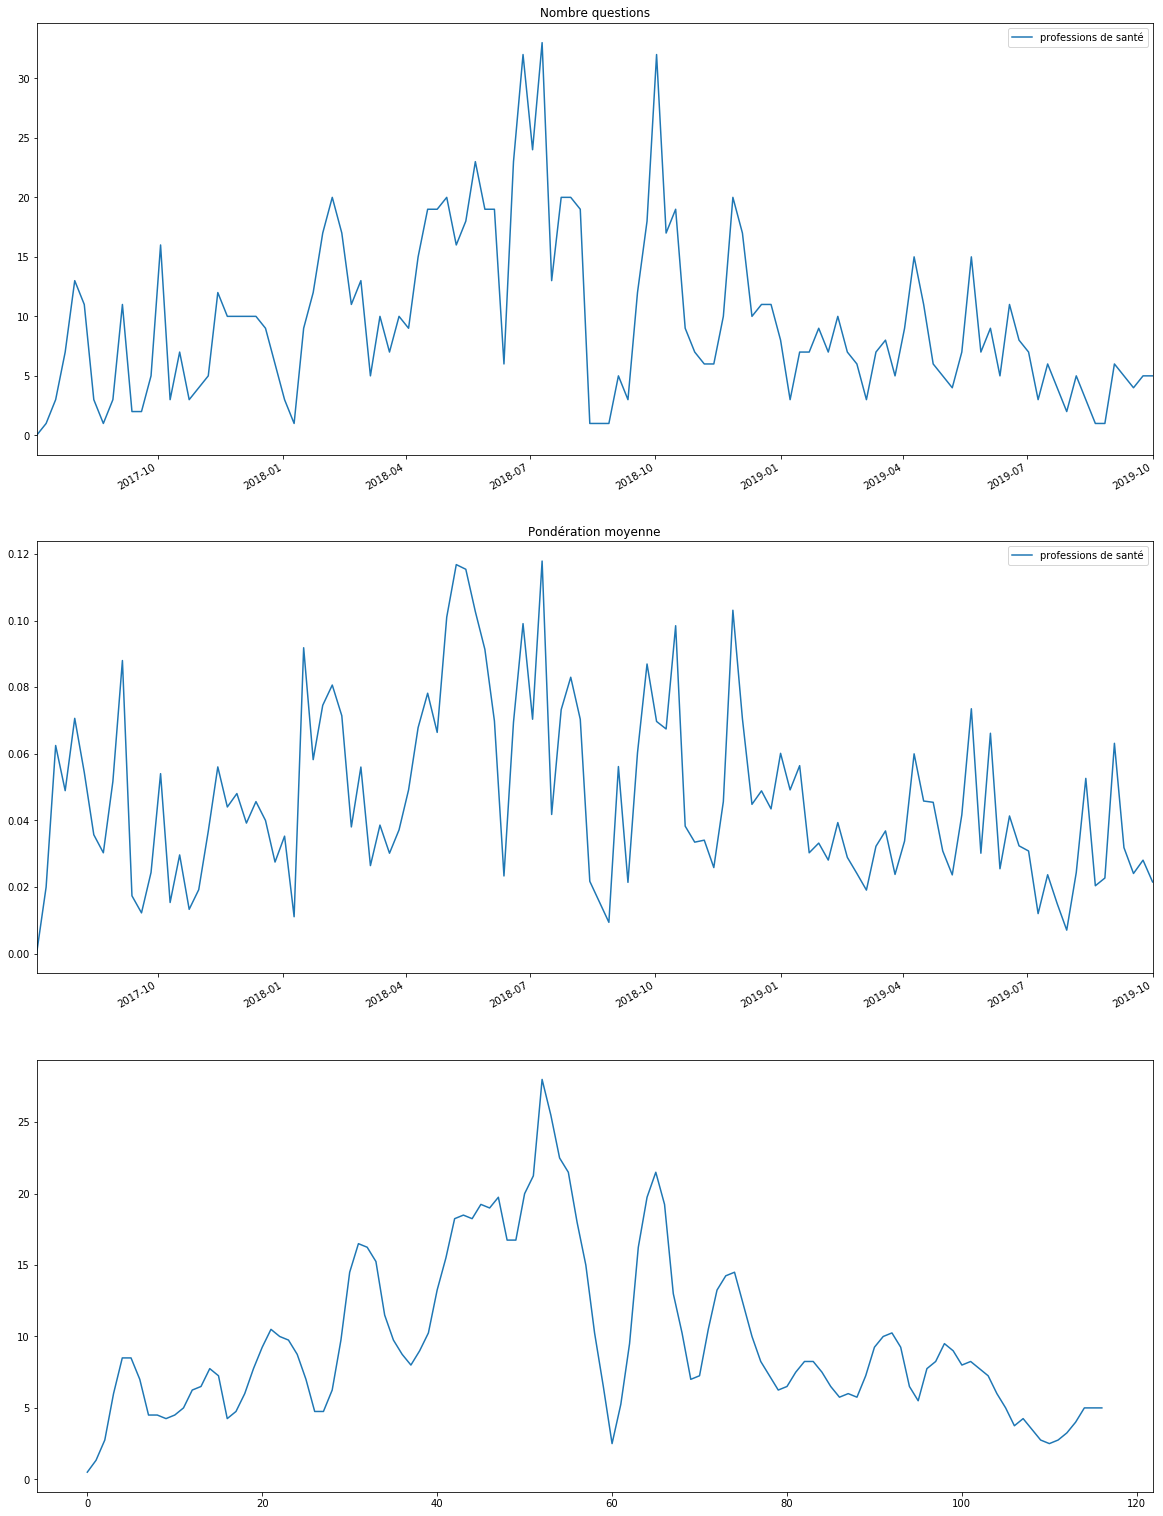

In [16]:
t = themes[0]
#fig, axes = plt.subplots(nrows=3, ncols=1, figsize = (20,30))
#count_df_week.plot(y=t,ax = axes[0],title = "Nombre questions")
#count_df_week.mean(axis = 1).plot(ax = axes[1], figsize = (20,30),title = "Total")
#count_df_week_pondmean.plot(y=t,ax = axes[1],title = "Pondération moyenne")
#plt.plot(lissage(2,count_df_week[t]))
#plt.plot(lissage(2,count_df_week_pondmean[t]))

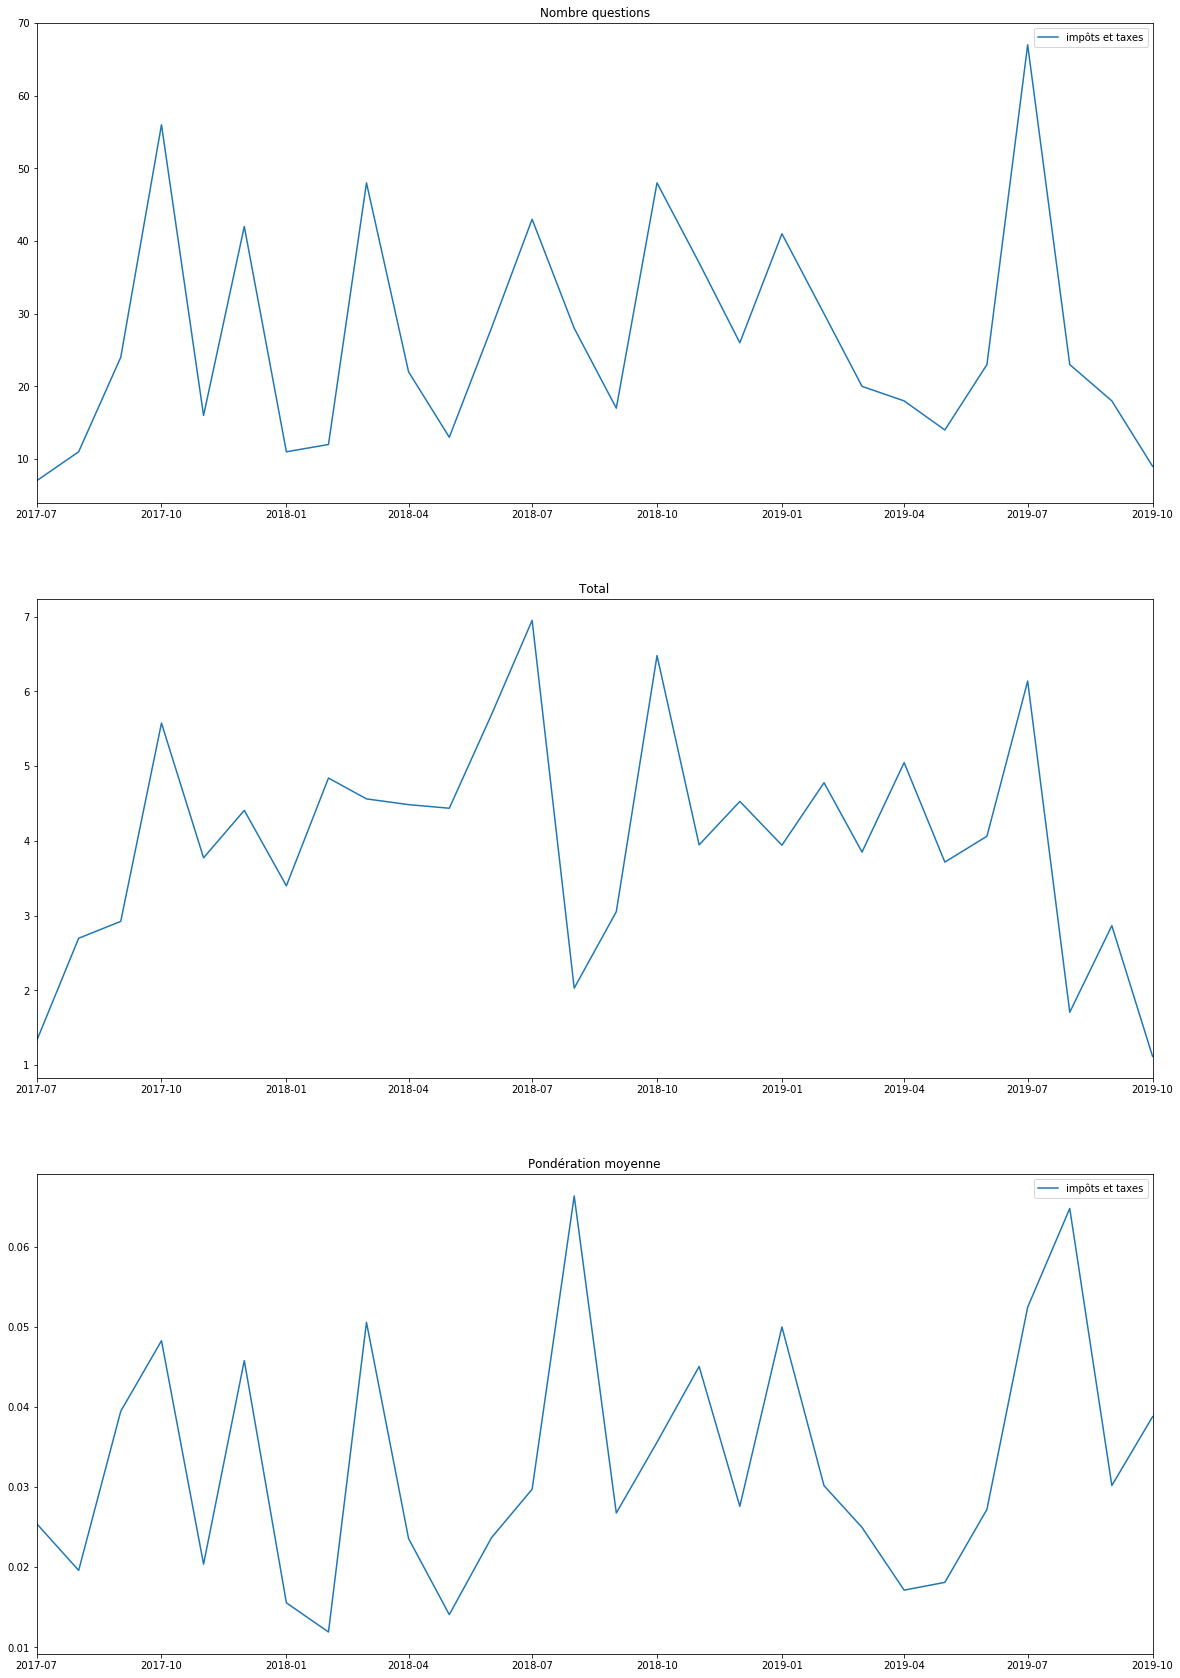

In [17]:
t = themes[3]
#fig, axes = plt.subplots(nrows=3, ncols=1)
#count_df_month.plot(y=t,ax = axes[0],title = "Nombre questions")
#count_df_month.mean(axis = 1).plot(ax = axes[1], figsize = (20,30),title = "Total")
#count_df_month_pondmean.plot(y=t,ax = axes[2],title = "Pondération moyenne")